<a href="https://colab.research.google.com/github/Reyqq/learning/blob/main/%D0%91%D1%83%D1%81%D1%82%D0%B8%D0%BD%D0%B3%D0%B8/%D0%90%D0%BD%D1%81%D0%B0%D0%BC%D0%B1%D0%BB%D0%B8_%D0%B2_%D0%BC%D0%B0%D1%88%D0%B8%D0%BD%D0%BD%D0%BE%D0%BC_%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ансамблевые методы в машинном обучении

**Ансамбль (ensemble) в машинном обучении** — метод машинного обучения, где несколько моделей обучаются для решения одной и той же проблемы и объединяются для получения лучших результатов называется ансамблевым методом. Основная предпосылка заключается в том, что результат работы нескольких моделей будет более точен, чем результат только одной модели.

Когда говорится об ансамблях, то вводится понятие слабого ученика(обычные модели вроде линейной регрессии или дерева решений). Множество слабых учеников являются строительными блоками для более сложных моделей. Объединение слабых учеников для улучшения качества модели, уменьшения смещения или разброса, называется сильным учеником.

# Для чего нужен ансамбль?
1. **Улучшение точности:** Ансамблевые методы часто дают более точные предсказания по сравнению с отдельными моделями. Это связано с тем, что ошибки разных моделей могут компенсировать друг друга.
2. **Уменьшение дисперсии:** Они помогают уменьшить дисперсию модели, что снижает риск переобучения.
3. **Устойчивость:** Ансамбли менее чувствительны к отдельным ошибкам или шуму в данных, так как объединяют результаты нескольких моделей.

# Зачем применяется ансамбль?

Ансамбли применяются для улучшения производительности моделей в различных задачах машинного обучения, таких как классификация, регрессия и кластеризация. Они особенно полезны, когда:
- Одна модель не может достичь необходимой точности.
- Необходимо уменьшить риск переобучения.
- Данные содержат шум или выбросы.

# Виды ансамблевых методов
Наиболее популярными ансамблевыми методами являются: **стекинг(stacking)**, **бэггинг(bagging)**, **бустинг(boosting)**.
- **Cтекинг(stacking)**. Используется несколько разнородных слабых учеников. Их обучают и объединяют для построения прогноза, основанного на результатах различных слабых моделей.

- **Бэггинг(bagging)**. В этом случае однородные модели обучают на разных наборах данных и объединяют. Получают прогноз путём усреднения. Если использовать в качестве слабого ученика деревья решений, то получится случайный лес **RandomForestClassifier / RandomForestRegressor**.

- **Бустинг(boosting)**. При использовании данного метода несколько однородных моделей последовательно обучаются, исправляя ошибки друг друга.

# Cтекинг(stacking)

Работа этого типа ансамблей довольно проста. На вход всех слабых прогнозаторов подаётся обучающий набор, каждый прогноз идёт к финальной модели, которая называется смеситель, мета-ученик или мета-модель, после чего та вырабатывает финальный прогноз.

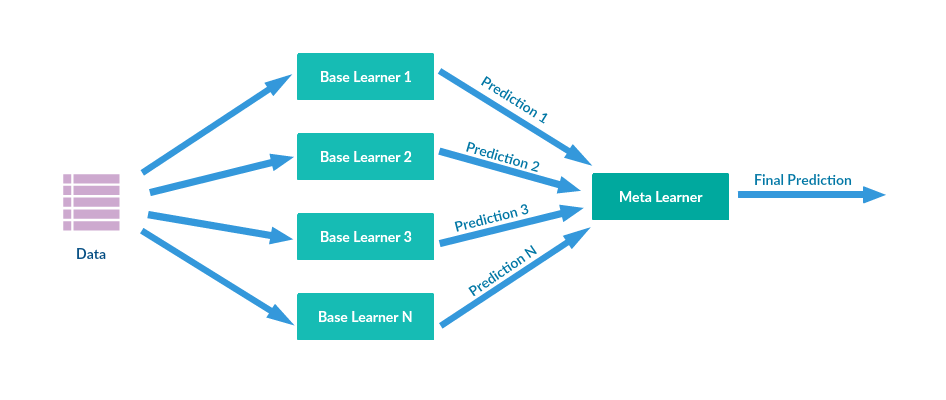

